In [1]:
import sys
sys.path.append('../../')

import torch 
import torch.nn as nn 
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from boston.dataset import BostonDataset
from model import NN
from compute_ntk import compute_ntk

In [2]:
dataset = BostonDataset("../../boston/Boston.csv")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
trainset, testset = torch.utils.data.random_split(dataset, [train_size, test_size])

xs_train = trainset[:][0]
ys_train = trainset[:][1].reshape(-1, 1)
x_ntk = trainset[:][0][:100]

## Hidden Layer of size 10:

In [3]:
all_losses_10 = []
all_borne_infinie_10 = []
all_borne_finie_10 = []

pbar = trange(10)
for i in pbar:
    model = NN(in_dim=13, hidden_dim=10)
    
    optimizer = optim.Adam(model.parameters(), lr=1e-5)
    criterion = nn.MSELoss()

    with torch.no_grad():
        ntk = compute_ntk(model,x_ntk)
        preds = model(xs_train)
    l, v = torch.linalg.eig(ntk)
    init_error = criterion(preds, ys_train).item()
    losses_simu = [init_error]
    lambdas_simu = [torch.min(l.real).item()]

    steps_loss = []
    
    for epoch in range(50):
        epoch_loss = 0
        for x, y in trainset:
            preds = model(x)
            loss = criterion(preds, y)
            epoch_loss+=loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            steps_loss.append(loss.item())
        with torch.no_grad():
            ntk = compute_ntk(model, x_ntk)
            preds = model(xs_train)
        l, v = torch.linalg.eig(ntk)
        train_loss = criterion(preds, ys_train)
        lam_min = torch.min(l.real)
        losses_simu.append(train_loss.item())
        lambdas_simu.append(lam_min.item())
        pbar.set_description(f'model {i+1} ; for epoch {epoch} ; current train loss is {epoch_loss/len(trainset)}')

    borne_infin = np.exp(-lambdas_simu[0]*(np.linspace(1, len(lambdas_simu), len(lambdas_simu))-1))*init_error
    borne_fin = np.exp(-np.asarray(lambdas_simu)*(np.linspace(1, len(lambdas_simu), len(lambdas_simu))-1))*init_error

    all_losses_10.append(losses_simu)
    all_borne_finie_10.append(borne_fin)
    all_borne_infinie_10.append(borne_infin)

model 10 ; for epoch 49 ; current train loss is 549.0238826558142: 100%|██████████| 10/10 [01:20<00:00,  8.03s/it]


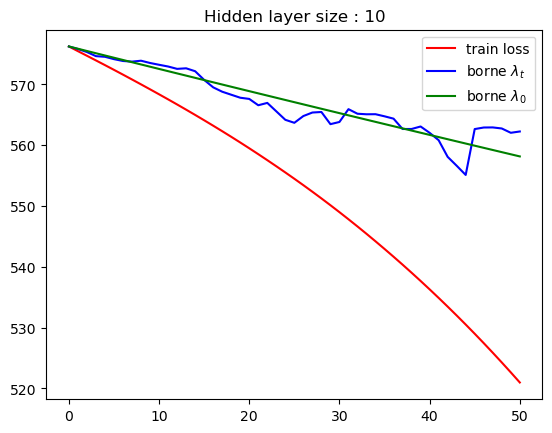

In [4]:
plt.plot(np.mean(all_losses_10, axis=0), c="red", label="train loss")
plt.plot(np.mean(all_borne_finie_10, axis=0), c="blue", label="borne $\lambda_t$")
plt.plot(np.mean(all_borne_infinie_10, axis=0), c="green", label="borne $\lambda_0$")
plt.title('Hidden layer size : 10')
plt.legend()

## Hidden Layer of size 100:

In [5]:
all_losses_100 = []
all_borne_infinie_100 = []
all_borne_finie_100 = []

pbar = trange(10)
for i in pbar:
    model = NN(in_dim=13, hidden_dim=100)
    
    optimizer = optim.Adam(model.parameters(), lr=1e-5)
    criterion = nn.MSELoss()

    with torch.no_grad():
        ntk = compute_ntk(model,x_ntk)
        preds = model(xs_train)
    l, v = torch.linalg.eig(ntk)
    init_error = criterion(preds, ys_train).item()
    losses_simu = [init_error]
    lambdas_simu = [torch.min(l.real).item()]

    steps_loss = []
    
    for epoch in range(50):
        epoch_loss = 0
        for x, y in trainset:
            preds = model(x)
            loss = criterion(preds, y)
            epoch_loss+=loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            steps_loss.append(loss.item())
        with torch.no_grad():
            ntk = compute_ntk(model, x_ntk)
            preds = model(xs_train)
        l, v = torch.linalg.eig(ntk)
        train_loss = criterion(preds, ys_train)
        lam_min = torch.min(l.real)
        losses_simu.append(train_loss.item())
        lambdas_simu.append(lam_min.item())
        pbar.set_description(f'model {i+1} ; for epoch {epoch} ; current train loss is {epoch_loss/len(trainset)}')

    borne_infin = np.exp(-lambdas_simu[0]*(np.linspace(1, len(lambdas_simu), len(lambdas_simu))-1))*init_error
    borne_fin = np.exp(-np.asarray(lambdas_simu)*(np.linspace(1, len(lambdas_simu), len(lambdas_simu))-1))*init_error

    all_losses_100.append(losses_simu)
    all_borne_finie_100.append(borne_fin)
    all_borne_infinie_100.append(borne_infin)

model 4 ; for epoch 12 ; current train loss is 368.0201063627731:  30%|███       | 3/10 [02:37<06:08, 52.62s/it] 


KeyboardInterrupt: 

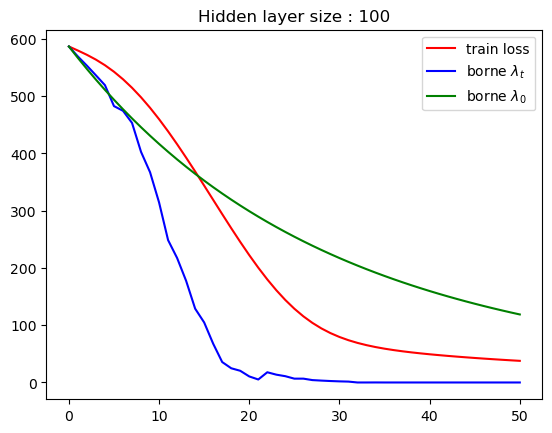

In [ ]:
plt.plot(np.mean(all_losses_100, axis=0), c="red", label="train loss")
plt.plot(np.mean(all_borne_finie_100, axis=0), c="blue", label="borne $\lambda_t$")
plt.plot(np.mean(all_borne_infinie_100, axis=0), c="green", label="borne $\lambda_0$")
plt.title('Hidden layer size : 100')
plt.legend()

## Hidden Layer of size 1000:

In [ ]:
all_losses_1000 = []
all_borne_infinie_1000 = []
all_borne_finie_1000 = []

pbar = trange(10)
for i in pbar:
    model = NN(in_dim=13, hidden_dim=1000)
    
    optimizer = optim.Adam(model.parameters(), lr=1e-5)
    criterion = nn.MSELoss()

    with torch.no_grad():
        ntk = compute_ntk(model,x_ntk)
        preds = model(xs_train)
    l, v = torch.linalg.eig(ntk)
    init_error = criterion(preds, ys_train).item()
    losses_simu = [init_error]
    lambdas_simu = [torch.min(l.real).item()]

    steps_loss = []
    
    for epoch in range(50):
        epoch_loss = 0
        for x, y in trainset:
            preds = model(x)
            loss = criterion(preds, y)
            epoch_loss+=loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            steps_loss.append(loss.item())
        with torch.no_grad():
            ntk = compute_ntk(model, x_ntk)
            preds = model(xs_train)
        l, v = torch.linalg.eig(ntk)
        train_loss = criterion(preds, ys_train)
        lam_min = torch.min(l.real)
        losses_simu.append(train_loss.item())
        lambdas_simu.append(lam_min.item())
        pbar.set_description(f'model {i+1} ; for epoch {epoch} ; current train loss is {epoch_loss/len(trainset)}')

    borne_infin = np.exp(-lambdas_simu[0]*(np.linspace(1, len(lambdas_simu), len(lambdas_simu))-1))*init_error
    borne_fin = np.exp(-np.asarray(lambdas_simu)*(np.linspace(1, len(lambdas_simu), len(lambdas_simu))-1))*init_error

    all_losses_1000.append(losses_simu)
    all_borne_finie_1000.append(borne_fin)
    all_borne_infinie_1000.append(borne_infin)

model 10 ; for epoch 49 ; current train loss is 9.160301139345572: 100%|██████████| 10/10 [10:00<00:00, 60.09s/it]


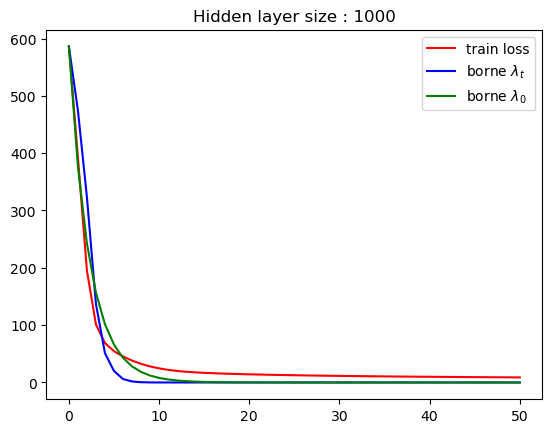

In [ ]:
plt.plot(np.mean(all_losses_1000, axis=0), c="red", label="train loss")
plt.plot(np.mean(all_borne_finie_1000, axis=0), c="blue", label="borne $\lambda_t$")
plt.plot(np.mean(all_borne_infinie_1000, axis=0), c="green", label="borne $\lambda_0$")
plt.title('Hidden layer size : 1000')
plt.legend()